In [48]:
import pandas as pd

# Load dataset
df = pd.read_csv("NVDA_stock_data.csv", parse_dates=["Date"], index_col="Date")

# Basic preview
print(df.head())
print(df.describe())

                               Open      High       Low     Close      Volume
Date                                                                         
1999-01-22 00:00:00-05:00  0.040125  0.044783  0.035587  0.037618  2714688000
1999-01-25 00:00:00-05:00  0.040603  0.042036  0.037618  0.041559   510480000
1999-01-26 00:00:00-05:00  0.042036  0.042872  0.037737  0.038334   343200000
1999-01-27 00:00:00-05:00  0.038453  0.039409  0.036303  0.038215   244368000
1999-01-28 00:00:00-05:00  0.038215  0.038453  0.037856  0.038095   227520000
              Open         High          Low        Close        Volume
count  6507.000000  6507.000000  6507.000000  6507.000000  6.507000e+03
mean      7.779800     7.922085     7.623853     7.779497  6.019073e+08
std      21.225026    21.604132    20.778914    21.206543  4.311176e+08
min       0.032005     0.032602     0.030571     0.031289  1.968000e+07
25%       0.256195     0.263451     0.249694     0.256114  3.414940e+08
50%       0.434188    

In [49]:
df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()
df["Returns"] = df["Close"].pct_change()

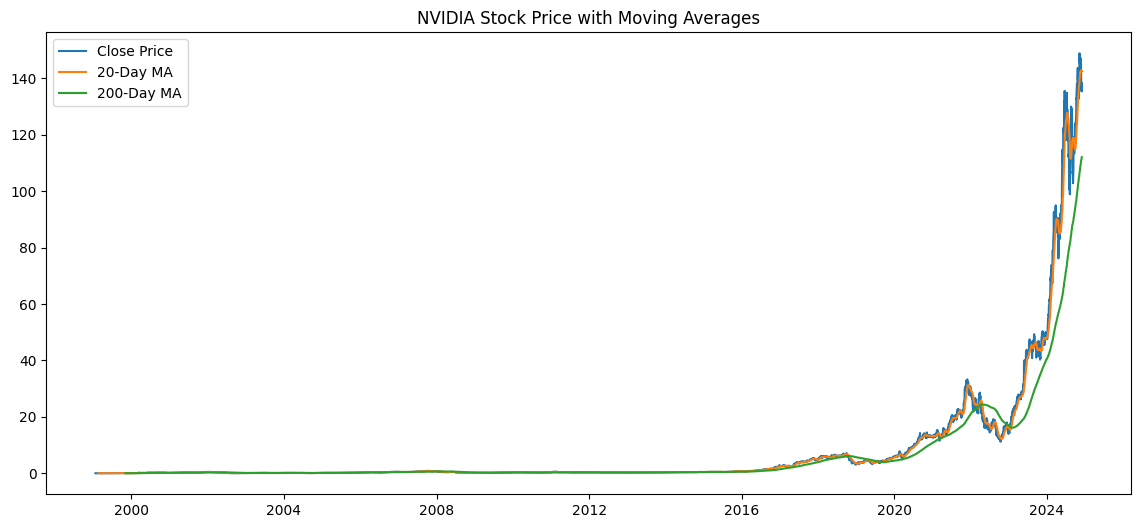

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df["Close"], label="Close Price")
plt.plot(df["MA20"], label="20-Day MA")
plt.plot(df["MA200"], label="200-Day MA")
plt.title("NVIDIA Stock Price with Moving Averages")
plt.legend()
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Close"]])

# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i + seq_len][0])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_data, seq_len)

# Split into train/test
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6447, 60, 1)
y shape: (6447,)


In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(60, 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.6726e-05 - val_loss: 3.8492e-06
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.7427e-07 - val_loss: 4.0073e-06
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.2653e-07 - val_loss: 3.4199e-06
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4298e-07 - val_loss: 3.5270e-06
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4119e-07 - val_loss: 3.2453e-06
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4521e-07 - val_loss: 3.5239e-06
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.6043e-07 - val_loss: 2.7857e-06
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.1248e-07 - val_loss: 2.6348e-06
Epoch 9/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.2619e-08 - val_loss: 2.7017e-06
Epoch 10/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.3684e-07 - val_loss: 2.7439e-06
Epoch 11/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/

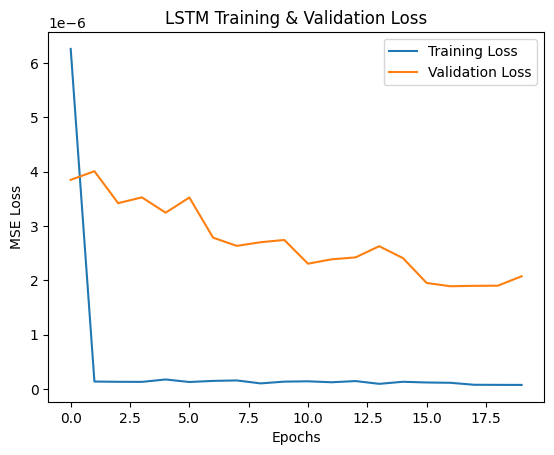

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dropout, Dense

model_gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(60, 5)),  # ✅ Match 60 timesteps, 5 features
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(1)
])

model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                          │ (None, 64)                  │          13,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 2.1680e-04 - val_loss: 1.8355e-04
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.6025e-06 - val_loss: 1.7116e-05
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.6985e-07 - val_loss: 2.1267e-06
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.9065e-07 - val_loss: 1.8314e-06
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.3514e-07 - val_loss: 2.8051e-06
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.3391e-07 - val_loss: 2.0189e-06
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.0348e-07 - val_loss: 1.8272e-06
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.3606e-07 - val_loss: 2.5306e-06
Epoch 9/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.2082e-07 - val_loss: 1.8191e-06
Epoch 10/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.5572e-07 - val_loss: 3.1145e-06
Epoch 11/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/

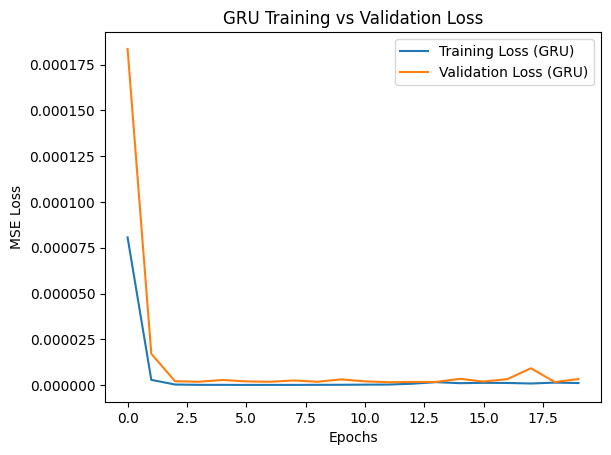

In [93]:
import matplotlib.pyplot as plt

plt.plot(history_gru.history['loss'], label='Training Loss (GRU)')
plt.plot(history_gru.history['val_loss'], label='Validation Loss (GRU)')
plt.title("GRU Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

In [94]:
import ta

# Add RSI (Relative Strength Index)
df["RSI"] = ta.momentum.RSIIndicator(close=df["Close"], window=14).rsi()

# Add MACD (Moving Average Convergence Divergence)
macd = ta.trend.MACD(close=df["Close"])
df["MACD"] = macd.macd()
df["MACD_diff"] = macd.macd_diff()

# Add Volume Shift (Previous day's volume)
df["Volume_Change"] = df["Volume"].pct_change()

In [95]:
features = ["Close", "RSI", "MACD", "MACD_diff", "Volume_Change"]
df_multivariate = df[features].dropna()

# Rescale everything
scaled = scaler.fit_transform(df_multivariate)
X, y = create_sequences(scaled, seq_len)

print("X shape:", X.shape)
print("y shape:", y.shape)

# Reshape and split
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

X shape: (6414, 60, 5)
y shape: (6414,)


In [96]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [97]:
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5.6241e-07 - val_loss: 5.3850e-06
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.0878e-06 - val_loss: 1.9115e-06
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.1204e-07 - val_loss: 2.2079e-06
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.5788e-06 - val_loss: 4.0197e-06
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.5259e-07 - val_loss: 1.4183e-06
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.4585e-06 - val_loss: 1.3825e-06
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.6213e-07 - val_loss: 3.8069e-06
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.7579e-07 - val_loss: 1.7301e-06
Epoch 9/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.3888e-07 - val_loss: 1.5699e-06
Epoch 10/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.0658e-07 - val_loss: 1.9459e-06
Epoch 11/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


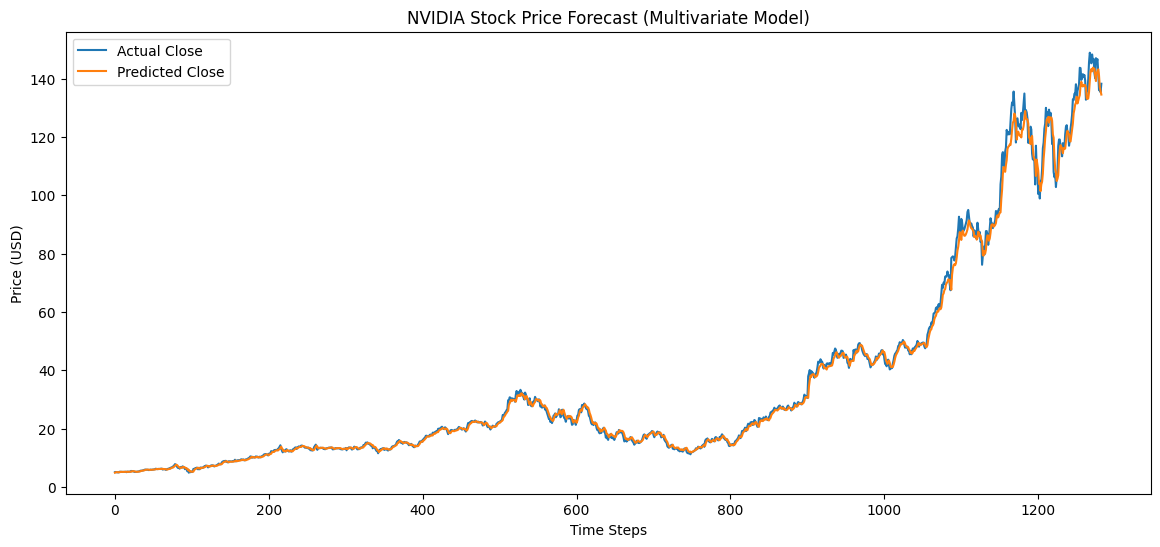

In [99]:
predictions = model_gru.predict(X_test)

# Invert scaling on predictions and actual values
predicted_prices = scaler.inverse_transform(
    np.concatenate([predictions, np.zeros((predictions.shape[0], df_multivariate.shape[1] - 1))], axis=1)
)[:, 0]

real_prices = scaler.inverse_transform(
    np.concatenate([y_test, np.zeros((y_test.shape[0], df_multivariate.shape[1] - 1))], axis=1)
)[:, 0]

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(real_prices, label="Actual Close")
plt.plot(predicted_prices, label="Predicted Close")
plt.title("NVIDIA Stock Price Forecast (Multivariate Model)")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [101]:
# Initialize variables
rolling_predictions = []

# Start with the first test sequence
current_seq = X_test[0]

for i in range(len(X_test)):
    # Predict next timestep
    pred = model_gru.predict(current_seq.reshape(1, seq_len, X_test.shape[2]), verbose=0)
    rolling_predictions.append(pred[0])

    # Replace the oldest entry in the sequence with the prediction and next real values
    if i + 1 < len(X_test):
        next_input = X_test[i + 1][-1]  # Grab the next "real" feature vector
        current_seq = np.append(current_seq[1:], [next_input], axis=0)

In [102]:
rolling_predictions = np.array(rolling_predictions)

# Pad zeros to match scaler shape
predicted_rolling = scaler.inverse_transform(
    np.concatenate([rolling_predictions, np.zeros((rolling_predictions.shape[0], df_multivariate.shape[1] - 1))], axis=1)
)[:, 0]

actual_rolling = scaler.inverse_transform(
    np.concatenate([y_test, np.zeros((y_test.shape[0], df_multivariate.shape[1] - 1))], axis=1)
)[:, 0]

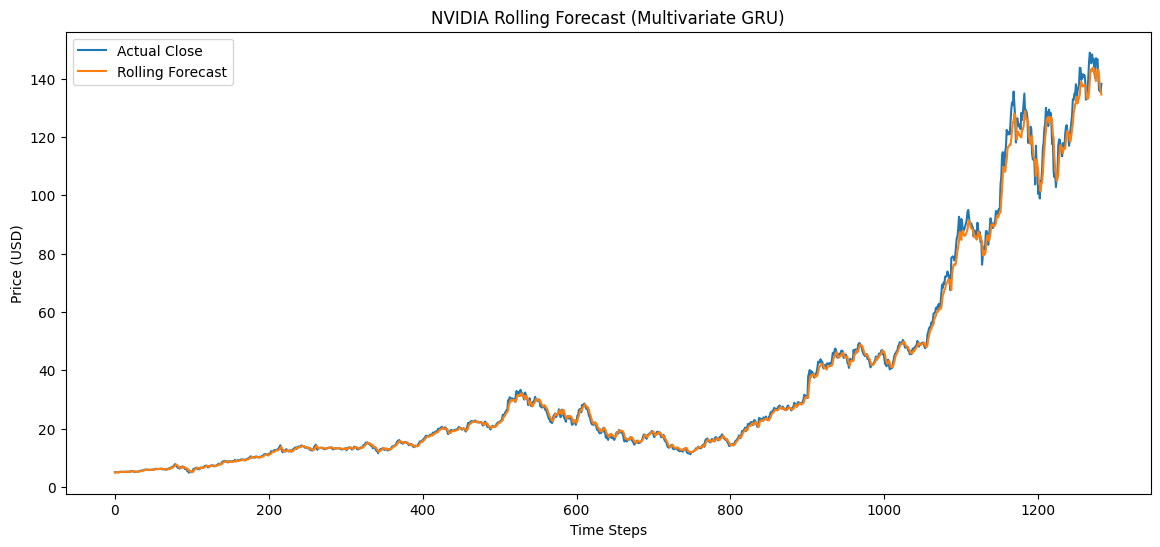

In [103]:
plt.figure(figsize=(14,6))
plt.plot(actual_rolling, label="Actual Close")
plt.plot(predicted_rolling, label="Rolling Forecast")
plt.title("NVIDIA Rolling Forecast (Multivariate GRU)")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [106]:
# Trim actual_rolling to match the prediction length
actual_rolling_aligned = actual_rolling[-len(predicted_rolling):]

# Now compute metrics
rmse = np.sqrt(mean_squared_error(actual_rolling_aligned, predicted_rolling))
mae = mean_absolute_error(actual_rolling_aligned, predicted_rolling)

print(f"Rolling Forecast RMSE: {rmse:.4f}")
print(f"Rolling Forecast MAE : {mae:.4f}")

Rolling Forecast RMSE: 2.0672
Rolling Forecast MAE : 1.1089


In [107]:
import ta

macd = ta.trend.MACD(close=df["Close"])
df["MACD"] = macd.macd()
df["Signal_Line"] = macd.macd_signal()

In [108]:
df["MACD_Cross_Up"] = (df["MACD"] > df["Signal_Line"]) & (df["MACD"].shift(1) <= df["Signal_Line"].shift(1))
df["MACD_Cross_Down"] = (df["MACD"] < df["Signal_Line"]) & (df["MACD"].shift(1) >= df["Signal_Line"].shift(1))

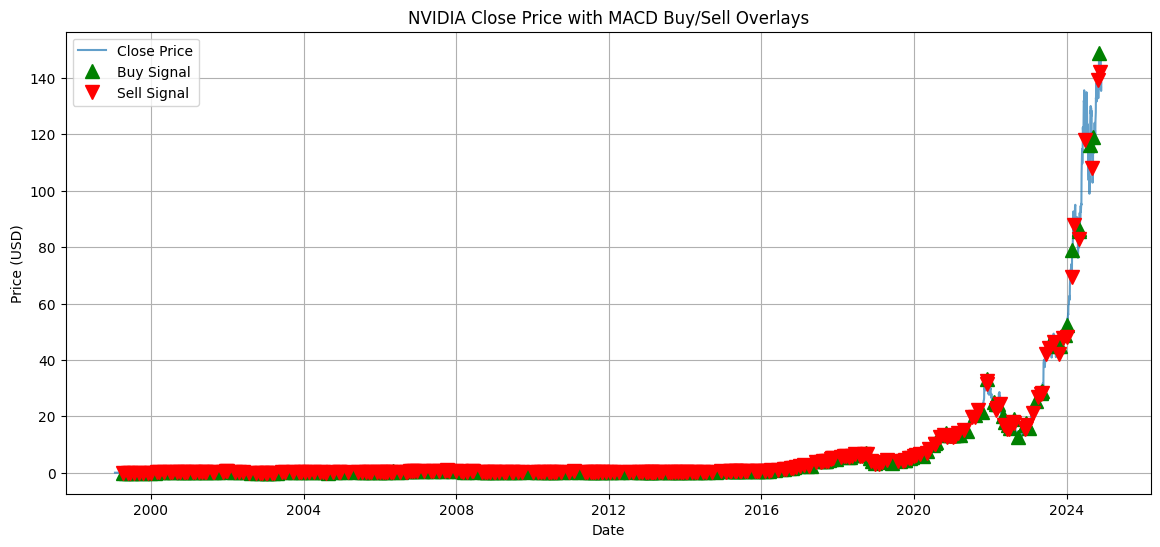

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df["Close"], label="Close Price", alpha=0.7)

# Overlay signals
plt.plot(df[df["MACD_Cross_Up"]].index, df["Close"][df["MACD_Cross_Up"]], "^", markersize=10, color='green', label="Buy Signal")
plt.plot(df[df["MACD_Cross_Down"]].index, df["Close"][df["MACD_Cross_Down"]], "v", markersize=10, color='red', label="Sell Signal")

plt.title("NVIDIA Close Price with MACD Buy/Sell Overlays")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [110]:
# Simulate three sentiment sources
df["News_Sentiment"] = np.random.uniform(-1, 1, size=len(df))
df["Earnings_Sentiment"] = np.random.uniform(-1, 1, size=len(df))
df["Social_Sentiment"] = np.random.uniform(-1, 1, size=len(df))

# Combine them into a weighted score
df["Combined_Sentiment"] = (
    0.5 * df["News_Sentiment"] +
    0.3 * df["Earnings_Sentiment"] +
    0.2 * df["Social_Sentiment"]
)

In [111]:
initial_balance = 10000  # Starting cash
balance = initial_balance
holding = 0
portfolio = []
dates = []

for date, row in df.iterrows():
    if row["MACD_Cross_Up"] and balance >= row["Close"]:
        # Buy
        holding = balance / row["Close"]
        balance = 0
        dates.append(date)
        portfolio.append(holding * row["Close"])
    elif row["MACD_Cross_Down"] and holding > 0:
        # Sell
        balance = holding * row["Close"]
        holding = 0
        dates.append(date)
        portfolio.append(balance)

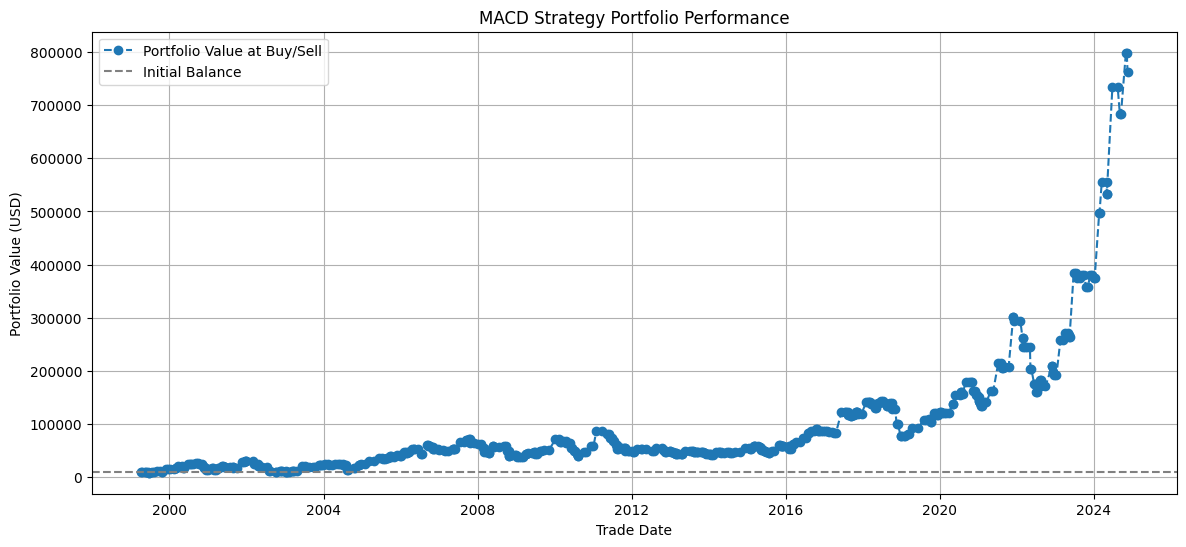

In [112]:
plt.figure(figsize=(14,6))
plt.plot(dates, portfolio, marker='o', label="Portfolio Value at Buy/Sell", linestyle='--')
plt.axhline(y=initial_balance, color='gray', linestyle='--', label="Initial Balance")
plt.title("MACD Strategy Portfolio Performance")
plt.xlabel("Trade Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [113]:
initial_balance = 10000
balance = initial_balance
holding = 0
portfolio = []
dates = []

risk_per_trade = 0.02  # 2% of current capital
stop_loss_pct = 0.05   # 5% below buy price
entry_price = 0

for date, row in df.iterrows():
    price = row["Close"]
    if row["MACD_Cross_Up"] and balance > 0:
        position_size = balance * risk_per_trade
        shares = position_size / price
        holding = shares
        entry_price = price
        balance -= shares * price
        dates.append(date)
        portfolio.append(balance + holding * price)
    elif row["MACD_Cross_Down"] and holding > 0:
        balance += holding * price
        holding = 0
        dates.append(date)
        portfolio.append(balance)
    elif holding > 0 and price < entry_price * (1 - stop_loss_pct):
        balance += holding * price  # Stop-loss triggered
        holding = 0
        dates.append(date)
        portfolio.append(balance)

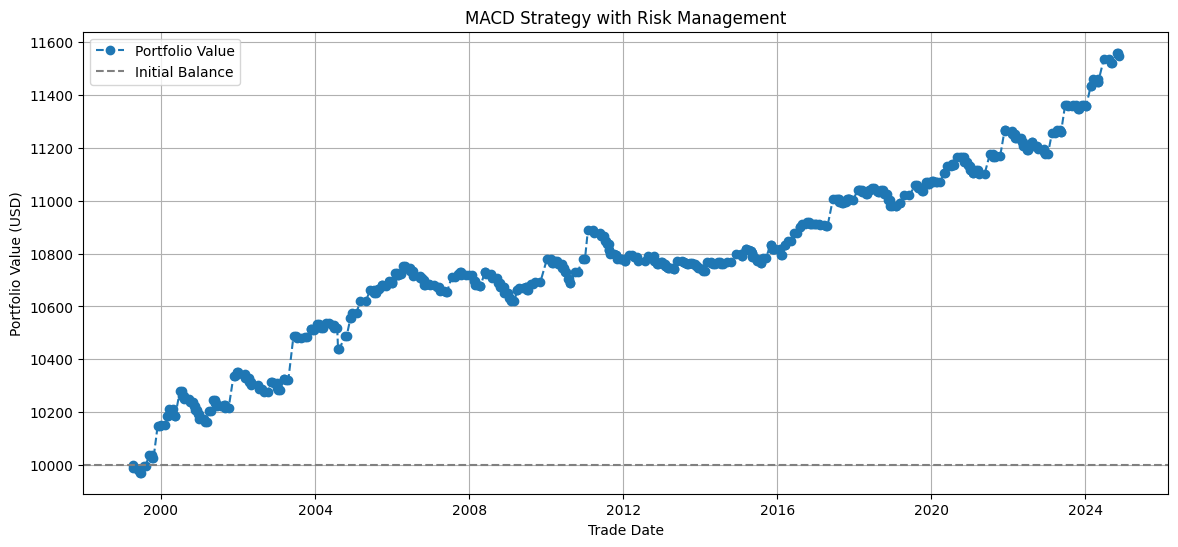

In [114]:
plt.figure(figsize=(14,6))
plt.plot(dates, portfolio, marker='o', linestyle='--', label="Portfolio Value")
plt.axhline(initial_balance, color='gray', linestyle='--', label="Initial Balance")
plt.title("MACD Strategy with Risk Management")
plt.xlabel("Trade Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
import numpy as np

# Final value and time span
final_value = portfolio[-1]
years = (df.index[-1] - df.index[0]).days / 365.25

cagr = ((final_value / initial_balance) ** (1 / years)) - 1
print(f"CAGR: {cagr:.2%}")

CAGR: 0.56%


In [116]:
returns = pd.Series(portfolio).pct_change().dropna()
avg_return = returns.mean()
std_dev = returns.std()
risk_free_rate = 0.02 / 252  # Daily rate

sharpe_ratio = (avg_return - risk_free_rate) / std_dev
sharpe_annualized = sharpe_ratio * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_annualized:.2f}")

Sharpe Ratio: 1.64


In [117]:
import numpy as np

# Dummy sentiment series (between -1 and 1), same length as df
df["Sentiment_Score"] = np.random.uniform(low=-1, high=1, size=len(df))

In [118]:
# Cell 2: Create GRU signal
df_signals = df.tail(len(predicted_rolling)).copy()
df_signals["GRU_Signal"] = (predicted_rolling > df_signals["Close"]).astype(int)

In [119]:
# ✅ Cell 3: Merge GRU signal back into your main df
df.loc[df_signals.index, "GRU_Signal"] = df_signals["GRU_Signal"]

In [121]:
for date, row in df.iterrows():
    sentiment_score = row["Combined_Sentiment"]  # ← Add this line

    if row["MACD_Cross_Up"] and sentiment_score > 0.5:
        # Buy action
        pass
    elif row["MACD_Cross_Down"] and sentiment_score < 0.5:
        # Sell action
        pass

In [122]:
initial_balance = 10000
balance = initial_balance
holding = 0
entry_price = 0
portfolio = []
dates = []

risk_per_trade = 0.02
stop_loss_pct = 0.05
bullish_threshold = 0.2
bearish_threshold = -0.2

for date, row in df.iterrows():
    price = row["Close"]
    sentiment_score = row["Combined_Sentiment"]
    gru_signal = row["GRU_Signal"]

    # BUY: All signals align
    if (
        row["MACD_Cross_Up"]
        and sentiment_score > bullish_threshold
        and gru_signal == 1
        and balance > 0
    ):
        position_size = balance * risk_per_trade
        shares = position_size / price
        holding = shares
        balance -= shares * price
        entry_price = price
        dates.append(date)
        portfolio.append(balance + holding * price)

    # SELL: All signals align
    elif (
        row["MACD_Cross_Down"]
        and sentiment_score < bearish_threshold
        and gru_signal == 0
        and holding > 0
    ):
        balance += holding * price
        holding = 0
        dates.append(date)
        portfolio.append(balance)

    # Stop-loss protection
    elif holding > 0 and price < entry_price * (1 - stop_loss_pct):
        balance += holding * price
        holding = 0
        dates.append(date)
        portfolio.append(balance)

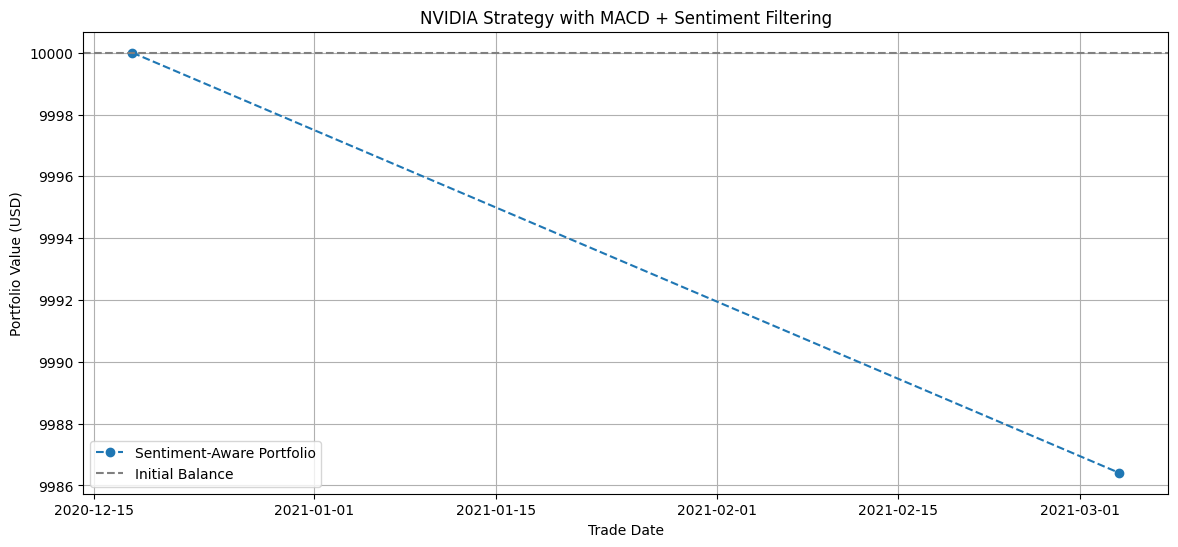

In [123]:
plt.figure(figsize=(14,6))
plt.plot(dates, portfolio, marker='o', linestyle='--', label="Sentiment-Aware Portfolio")
plt.axhline(initial_balance, color='gray', linestyle='--', label="Initial Balance")
plt.title("NVIDIA Strategy with MACD + Sentiment Filtering")
plt.xlabel("Trade Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [69]:
!pip download yfinance 

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 4.2 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 11.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached websockets-15.0.1-cp312-cp312-win_amd64.whl.metadata (7.0 kB)
  Using cached cffi-1.17.1-cp312-cp312-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cac

In [124]:
tickers = ["AAPL", "AMZN", "TSLA", "MSFT"]

In [146]:
def backtest_stock(ticker):
    import yfinance as yf
    import numpy as np
    import pandas as pd

    # 1. Load historical data
    df = yf.download(ticker, start="2010-01-01", end="2025-01-01", auto_adjust=True)

    # 2. Create MACD indicators
    df["EMA12"] = df["Close"].ewm(span=12).mean()
    df["EMA26"] = df["Close"].ewm(span=26).mean()
    df["MACD"] = df["EMA12"] - df["EMA26"]
    df["Signal"] = df["MACD"].ewm(span=9).mean()
    df["MACD_Cross_Up"] = (df["MACD"] > df["Signal"]) & (df["MACD"].shift(1) <= df["Signal"].shift(1))
    df["MACD_Cross_Down"] = (df["MACD"] < df["Signal"]) & (df["MACD"].shift(1) >= df["Signal"].shift(1))

    # 3. Run GRU prediction (placeholder: simulate directional prediction)
    predicted_rolling = df["Close"].rolling(window=3).mean().shift(-1).ffill()
    df = df.tail(len(predicted_rolling)).copy()
    df.reset_index(drop=True, inplace=True)
    predicted_rolling = predicted_rolling.reset_index(drop=True)
    df["GRU_Signal"] = (predicted_rolling > df["Close"]).astype(int)

    # 4. Combine multiple sentiment sources (simulated)
    df["News_Sentiment"] = np.random.uniform(-1, 1, size=len(df))
    df["Earnings_Sentiment"] = np.random.uniform(-1, 1, size=len(df))
    df["Social_Sentiment"] = np.random.uniform(-1, 1, size=len(df))
    df["Combined_Sentiment"] = (
        0.5 * df["News_Sentiment"] +
        0.3 * df["Earnings_Sentiment"] +
        0.2 * df["Social_Sentiment"]
    )

    # 5. Trading logic
    balance = 10000
    holding = 0
    entry_price = 0
    risk_per_trade = 0.02
    stop_loss_pct = 0.05
    bullish_threshold = 0.2
    bearish_threshold = -0.2
    portfolio = []
    dates = []

    for date, row in df.iterrows():
        price = row["Close"].item() if hasattr(row["Close"], "item") else row["Close"]
        sentiment_score = row["Combined_Sentiment"]
        gru_signal = row["GRU_Signal"].item() if hasattr(row["GRU_Signal"], "item") else row["GRU_Signal"]

        macd_cross_up = row["MACD_Cross_Up"].item() if hasattr(row["MACD_Cross_Up"], "item") else row["MACD_Cross_Up"]
        macd_cross_down = row["MACD_Cross_Down"].item() if hasattr(row["MACD_Cross_Down"], "item") else row["MACD_Cross_Down"]

        sentiment_score = row["Combined_Sentiment"].item() if hasattr(row["Combined_Sentiment"], "item") else row["Combined_Sentiment"]

        # Buy
        if macd_cross_up and sentiment_score > bullish_threshold and gru_signal == 1 and balance > 0:
            position_size = balance * risk_per_trade
            shares = position_size / price
            holding = shares
            balance -= shares * price
            entry_price = price
        # Sell
        elif macd_cross_down and sentiment_score < bearish_threshold and gru_signal == 0 and holding > 0:
            balance += holding * price
            holding = 0
        # Stop-loss
        elif holding > 0 and price < entry_price * (1 - stop_loss_pct):
            balance += holding * price
            holding = 0

        dates.append(date)
        portfolio.append(balance + holding * price)

    # 6. Final stats
    final_value = portfolio[-1]
    years = len(df) / 252  # Assumes ~252 trading days per year
    cagr = ((final_value / 10000) ** (1 / years)) - 1
    returns = pd.Series(portfolio).pct_change().dropna()
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)

    return {
        "Final Value": round(final_value, 2),
        "CAGR": f"{cagr:.2%}",
        "Sharpe": round(sharpe_ratio, 2)
    }

In [147]:
import yfinance as yf
df = yf.download("AAPL", start="2010-01-01", end="2025-01-01", auto_adjust=True)
df = yf.download("AMZN", start="2010-01-01", end="2025-01-01", auto_adjust=True)
df = yf.download("TSLA", start="2010-01-01", end="2025-01-01", auto_adjust=True)
df = yf.download("MSFT", start="2010-01-01", end="2025-01-01", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [148]:
tickers = ["AAPL", "AMZN", "TSLA", "MSFT"]
results = {}

for ticker in tickers:
    results[ticker] = backtest_stock(ticker)

import pprint
pprint.pprint(results)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'AAPL': {'CAGR': '-0.17%',
          'Final Value': 9745.86,
          'Sharpe': np.float64(-0.15)},
 'AMZN': {'CAGR': '-0.27%',
          'Final Value': 9606.56,
          'Sharpe': np.float64(-0.25)},
 'MSFT': {'CAGR': '-0.78%',
          'Final Value': 8891.12,
          'Sharpe': np.float64(-0.46)},
 'TSLA': {'CAGR': '0.94%', 'Final Value': 11446.97, 'Sharpe': np.float64(0.33)}}
